In [1]:
import numpy as np
from skimage import io

In [2]:
img = io.imread('TestImage.png')

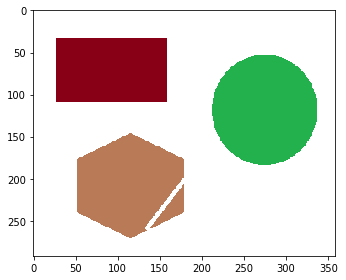

In [3]:
io.imshow(img)

In [4]:
img.shape

(292, 359, 3)

In [5]:
bimg = np.zeros((img.shape[0],img.shape[1]))
def toBinary(img,bimg):
#     temp = np.zeros(img.shape[0],img.shape[1])
    for i in range(len(img)):
        for j in range(len(img[0])):
            x = img[i][j]
            if (x[0]>240):
                bimg[i][j]=0;
            else:
                bimg[i][j]=1;
    return bimg;

In [6]:
bimg = toBinary(img,bimg)

In [7]:
(rows,columns) = (img.shape[0],img.shape[1])

In [8]:
bimg.shape

(292, 359)

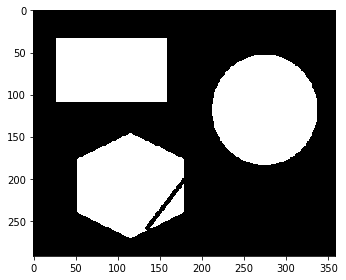

In [9]:
io.imshow(bimg)

In [10]:
count = 0
visited = []
cc = np.zeros(bimg.shape)
for k in range(rows):
    for l in range(columns):
        if(bimg[k][l] == 1):
            count+=1
            i = k
            j = l
            while True:   
                bimg[i][j]=0
                if (i-1>=0 and j-1>=0) and (bimg[i-1][j-1]== 1):
                    visited.append([i-1,j-1])
                if (i-1>=0) and (bimg[i-1][j]== 1):
                    visited.append([i-1,j])
                if (i-1>=0 and j+1<=columns-1) and (bimg[i-1][j+1] == 1):
                    visited.append([i-1,j+1])    
                if (j+1<=columns-1) and (bimg[i][j+1]== 1):
                    visited.append([i,j+1])
                if (i+1<=rows-1 and  j+1<=columns-1) and (bimg[i+1][j+1] == 1 ):
                    visited.append([i+1,j+1])
                if (i+1<=rows-1) and (bimg[i+1][j]== 1):
                    visited.append([i+1,j])
                if (i+1<=rows-1 and j-1>=0) and (bimg[i+1][j-1] == 1):
                    visited.append([i+1,j-1])
                if (j-1>=0) and (bimg[i][j-1]== 1):
                    visited.append([i,j-1])
                if len(visited)==0:
                    break
                cc[i][j] = count
                i,j = visited.pop()

C:\Users\GiridharaSPK\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


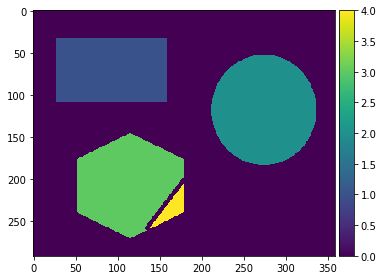

In [11]:
io.imshow(cc)

In [12]:
np.max(cc)

4.0

In [13]:
cc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
print("Number of components : ")
print(count)

Number of components : 
4
